# Drug Type Predictor

This notebook will create a model to predict drug to prescribe a patient given their demographic and other clinical data. 

The dataset is taken from [this Kaggle Dataset](https://www.kaggle.com/prathamtripathi/drug-classification)

# The Dataset

The dataset's target variable (drug type) contains 5 different medications: Drug A, Drug B, Drug C, Drug X and Y.

The feature sets of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients, and the target is the drug that each patient responded to.

We can see that it is an example of a multiclass classification problem.

First let's import the libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set(color_codes=True)

# The Data

Read the data using pandas.

In [3]:
df = pd.read_csv('Drug Data.csv', delimiter=",")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


Some info on the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,drugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


Alright. First, we need to encode the categorical features.

## Label Encoding

As you may figure out, some features in this dataset are categorical such as **Sex** or **BP**. 

Unfortunately, Sklearn Decision Trees do not handle categorical variables.

So, we would convert them into 'numerical' values by using `LabelEncoder` in the `sklearn` library.

In [6]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
df.loc[:,'Sex'] = le_sex.transform(df.loc[:,'Sex']) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
df.loc[:,'BP'] = le_BP.transform(df.loc[:,'BP'])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
df.loc[:,'Cholesterol'] = le_Chol.transform(df.loc[:,'Cholesterol']) 

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


Now we should also save the data.

In [7]:
df.to_csv('Label Encoded Drug Data.csv')

# Exploratory Analysis

Now we need to explore the data and see it's connection with the target variable. 

First, let's create box plots to see relation of continous variables and target and heatmap to see relation of categorical and target variable.

We need to get the non-encoded data to better see how relationship play into it.

In [8]:
df = pd.read_csv('Drug Data.csv')

In [9]:
continous = ['Age', 'Na_to_K']
categorical = ['Sex', 'BP', 'Cholesterol']

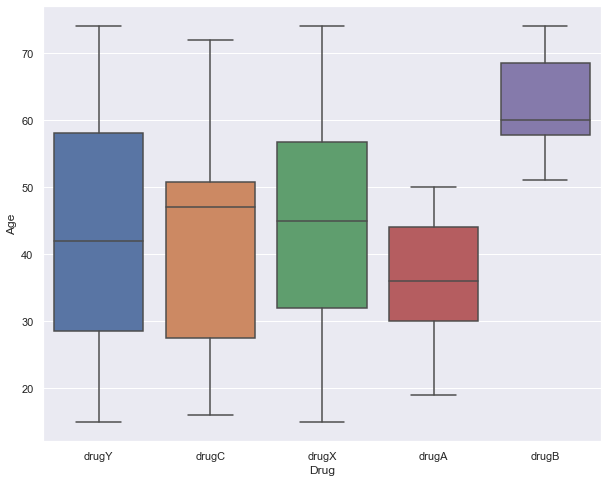

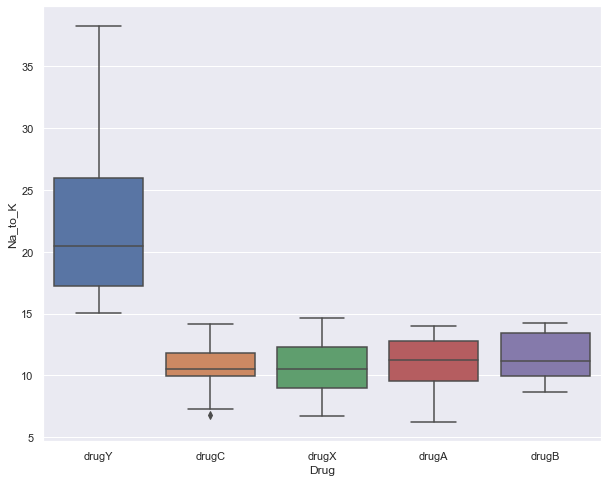

In [10]:
for feature in continous:
    plt.figure(figsize=(10,8))
    sns.boxplot(y=feature, x='Drug', data=df)

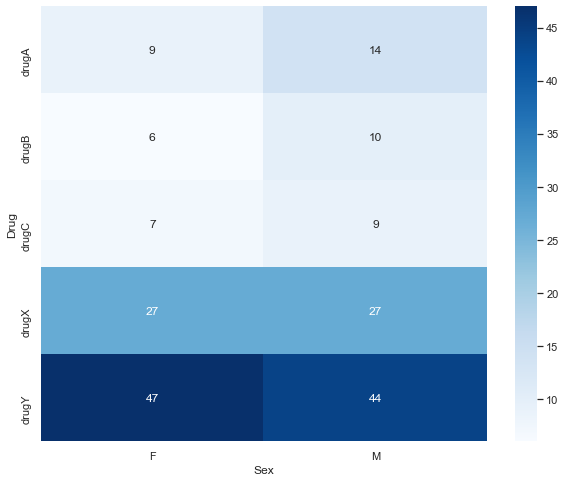

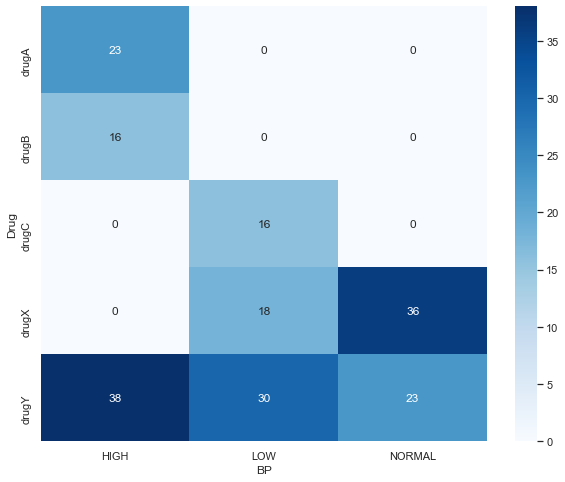

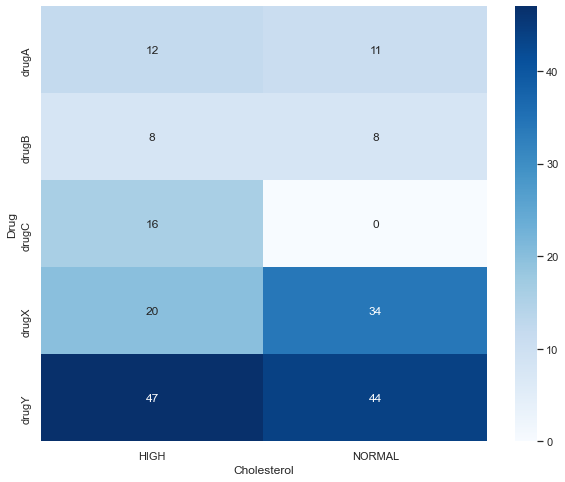

In [11]:
for feature in categorical:
    plt.figure(figsize=(10,8))
    heatmap_df = pd.crosstab(df['Drug'], df[feature])
    sns.heatmap(data=heatmap_df, annot=True, cmap='Blues')

It seems like every variable has a potential to help us in classification. So we would be using all of them to try and predict the drug type for our patient.

# Modeling

From the graphs, it seems as if each variable can help us divide into fairly discrete groups of drug type to choose from. 

Also, the dataset is not too big. So we can be fairly liberal with the time/space complexity too. 

So, let's try all the different models and see which one would work the best.

## Testing Different Models

In [12]:
df = pd.read_csv('Label Encoded Drug Data.csv')
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = df['Drug']

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score 

In [14]:
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    SVC()
]

In [15]:
for model in models:
    cv_score = cross_val_score(estimator=model, X=X, y=y, scoring='f1_micro')
    print(f'F1 Micro Score for {model}: ', cv_score, '\n')

C:\Users\gabhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gabhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

F1 Micro Score for LogisticRegression():  [0.925 0.825 0.825 0.85  0.9  ] 

F1 Micro Score for KNeighborsClassifier():  [0.775 0.725 0.775 0.625 0.575] 

F1 Micro Score for DecisionTreeClassifier():  [1.    1.    1.    0.925 1.   ] 

F1 Micro Score for SVC():  [0.75  0.7   0.725 0.65  0.7  ] 



It looks like Decision Tree is the clear winner. 

Logistic Regression even fails to converge. Although this could likely be prevented by scaling, increasing iterations and other methods, it's doubtful it could turn out to be better than Decision Tree's results as show in here. 

So, we are going to use Decision Trees to model our Drug Type Predictor.

# Decision Tree Modeling

To use decision tree we would be using the `DecisionTreeClassifier` from `sklearn`

We would also be using the criterion as entropy rather than gini since it usually is better metric and time/space is not an issue here. 

## Split into train/test

We will be using __train/test split__ to seperate into training and testing sets. 

Let's import first.

In [16]:
from sklearn.model_selection import train_test_split

We will be splitting in the train/test ratio of 7/3 with random state as 3.

In [17]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [18]:
drugTree = DecisionTreeClassifier(criterion='entropy')

DecisionTreeClassifier(criterion='entropy')

Next, we will fit the data with the training feature matrix _X_trainset_ and response vector _y_trainset_

In [19]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy')

# Prediction and Evaluation

Now, we need to make predictions on the testing dataset and then use metrics to evaluate our model.

In [20]:
y_hat = drugTree.predict(X_testset)

Next, we need to evaluate it. 

We would be using `metrics` in `sklearn`. 

In [21]:
from sklearn import metrics

In [22]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, y_hat))
print("\n")
print("DecisionTrees's Jaccard Index (micro): ", metrics.jaccard_score(y_testset, y_hat, average='micro'))
print("DecisionTrees's Jaccard Index (macro): ", metrics.jaccard_score(y_testset, y_hat, average='macro'))
print("\n")
print("DecisionTrees's precision Score (micro): ", metrics.precision_score(y_testset, y_hat, average='micro'))
print("DecisionTrees's precision Score (macro): ", metrics.precision_score(y_testset, y_hat, average='macro'))
print("\n")
print("DecisionTrees's recall Score (micro): ", metrics.recall_score(y_testset, y_hat, average='micro'))
print("DecisionTrees's recall Score (macro): ", metrics.recall_score(y_testset, y_hat, average='macro'))
print("\n")
print("DecisionTrees's F1 Score (micro): ", metrics.f1_score(y_testset, y_hat, average='micro'))
print("DecisionTrees's F1 Score (macro): ", metrics.f1_score(y_testset, y_hat, average='macro'))

DecisionTrees's Accuracy:  0.9833333333333333


DecisionTrees's Jaccard Index (micro):  0.9672131147540983
DecisionTrees's Jaccard Index (macro):  0.9817805383022774


DecisionTrees's precision Score (micro):  0.9833333333333333
DecisionTrees's precision Score (macro):  0.9913043478260869


DecisionTrees's recall Score (micro):  0.9833333333333333
DecisionTrees's recall Score (macro):  0.9904761904761905


DecisionTrees's F1 Score (micro):  0.9833333333333333
DecisionTrees's F1 Score (macro):  0.9906775067750677


Those are good scores. So, we can confidently say that our model is decent and is able to predict the drug for the patient to take with high accuracy.

# Grid Search

Let's try to optimize the max depth of the decision tree and get (hopefully) the best model.

First, let's import

In [23]:
from sklearn.model_selection import GridSearchCV

Now let's create the estimator and params grid.

In [24]:
dtreeClassifier = DecisionTreeClassifier(criterion='entropy')
dtreeClassifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [25]:
hyper_params = {'max_depth': [3, 4, 5, 6, 7, None]}

Now we need to pass into the `GridSearchCV` and get the object.

In [26]:
grid_dtree = GridSearchCV(dtreeClassifier, hyper_params, scoring='f1_micro')

Fit into it. We would be using the F1 micro score to estimate.

In [27]:
grid_dtree.fit(X, y)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': [3, 4, 5, 6, 7, None]},
             scoring='f1_micro')

Now, let's see the best estimator

In [28]:
grid_dtree.best_params_

{'max_depth': 4}

In [29]:
grid_dtree.best_score_

0.985

So, it turns out that 4 was the best max depth for the decision tree.

# Evaluation of Best Decision Tree from Grid Search

Now let's get the estimator and get all the relevant scores.

First, let's get the estimator.

In [30]:
best_dtree = grid_dtree.best_estimator_
best_dtree.fit(X_trainset, y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Now, let's predict from our test set

In [31]:
y_hat_b = best_dtree.predict(X_testset)

Finally, the scores:

In [32]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, y_hat_b))
print("\n")
print("DecisionTrees's Jaccard Index (micro): ", metrics.jaccard_score(y_testset, y_hat_b, average='micro'))
print("DecisionTrees's Jaccard Index (macro): ", metrics.jaccard_score(y_testset, y_hat_b, average='macro'))
print("\n")
print("DecisionTrees's precision Score (micro): ", metrics.precision_score(y_testset, y_hat_b, average='micro'))
print("DecisionTrees's precision Score (macro): ", metrics.precision_score(y_testset, y_hat_b, average='macro'))
print("\n")
print("DecisionTrees's recall Score (micro): ", metrics.recall_score(y_testset, y_hat_b, average='micro'))
print("DecisionTrees's recall Score (macro): ", metrics.recall_score(y_testset, y_hat_b, average='macro'))
print("\n")
print("DecisionTrees's F1 Score (micro): ", metrics.f1_score(y_testset, y_hat_b, average='micro'))
print("DecisionTrees's F1 Score (macro): ", metrics.f1_score(y_testset, y_hat_b, average='macro'))

DecisionTrees's Accuracy:  0.9833333333333333


DecisionTrees's Jaccard Index (micro):  0.9672131147540983
DecisionTrees's Jaccard Index (macro):  0.9817805383022774


DecisionTrees's precision Score (micro):  0.9833333333333333
DecisionTrees's precision Score (macro):  0.9913043478260869


DecisionTrees's recall Score (micro):  0.9833333333333333
DecisionTrees's recall Score (macro):  0.9904761904761905


DecisionTrees's F1 Score (micro):  0.9833333333333333
DecisionTrees's F1 Score (macro):  0.9906775067750677


# Conclusion

There you have it. A model to predict which drug the patient should take with a high accuracy.

# Author
By Abhinav Garg